In [1]:
import pandas as pd
dir = "F:\Afro\SpamtextDetectiondataset.xlsx"
df = pd.read_excel(dir)
df.head(10)

,text,Class
0,ফ্রি ১জিবি(শুধু .... অ্যাপে ব্যবহারের জন্য)-৭দ...,Normal
1,বাংলালিংক-এ ৫৯পঃ/মিঃ(+ট্যাক্স) ৩০দিন মেয়াদে পে...,Normal
2,ব্রাজিল বনাম দক্ষিণ কোরিয়া এর খেলা দেখুন ....-...,Normal
3,বাংলালিংক-এর ৩দিন মেয়াদে পাচ্ছেন ৯টাকার স্ক্র্...,Normal
4,৩জিবি-৩দিন-৳৪৯ পেতে রিচার্জ/ডায়াল *১২১*৩০৪৯#সী...,Normal
5,২৩টাকায় ১জিবি-৭দিন মেয়াদে পেতে রিচার্জ/ডায়াল *...,Normal
6,৪৭টাকায় ৬৫মিনিট ৩০দিন! কিনতে রিচার্জ ৪৭টাকা/ ড...,Normal
7,আপনার প্যাক ১জিবি(৩০০এমবি+৭২৪এমবি বোনাস)-৩দিন-...,Normal
8,কুরবানি মজাদার রেসিপি .... পেতে ডায়াল করুন *.....,Normal
9,"চাকরি খুজছেন,চাকরির .... পেতে ডায়াল করুন *.......",Normal


<AxesSubplot:ylabel='Class'>

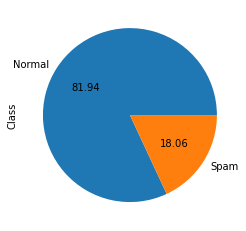

In [2]:
df['Class'].value_counts().plot.pie(autopct='%.2f')

In [3]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)
from bltk.langtools import Tokenizer
from bltk.langtools import remove_stopwords
from bltk.langtools import PosTagger
from bltk.langtools import Chunker
from bltk.langtools import UgraStemmer
import re

In [4]:
tokenizer = Tokenizer()


In [5]:
#text = df['text']
#text = text.remove("")

In [6]:
#stop_words = set(remove_stopwords(sentences))
#stop_words = set(stopwords.words("english"))

In [7]:
def text_preproc(x):
    #x = ' '.join([word for word in x.split( ) if word not in stop_words])
    x = re.sub(f'{digits}', ' ',x)
    #x = re.sub(f'{others}', ' ',x)
    #x = x.encode('ascii', 'ignore').decode()
    x = re.sub(f'https', ' ', x)
    #x = re.sub(f'@\S+', ' ', x)
    x = re.sub(f'-', '', x)
    x = re.sub(f'_', '', x)
    #x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(f'৳', '', x)
    #x = re.sub(f'\s{2,}', ' ', x)
    #x = re.sub(f'\[]', '', x)
    x = re.sub(f'/', '', x)
    
    return x


In [8]:
df['clean_text'] = df.text.apply(text_preproc)
df.head(10)

,text,Class,clean_text
0,ফ্রি ১জিবি(শুধু .... অ্যাপে ব্যবহারের জন্য)-৭দ...,Normal,ফ্রি জিবি(শুধু .... অ্যাপে ব্যবহারের জন্য) দি...
1,বাংলালিংক-এ ৫৯পঃ/মিঃ(+ট্যাক্স) ৩০দিন মেয়াদে পে...,Normal,বাংলালিংকএ পঃমিঃ(+ট্যাক্স) দিন মেয়াদে পেতে...
2,ব্রাজিল বনাম দক্ষিণ কোরিয়া এর খেলা দেখুন ....-...,Normal,ব্রাজিল বনাম দক্ষিণ কোরিয়া এর খেলা দেখুন ....ত...
3,বাংলালিংক-এর ৩দিন মেয়াদে পাচ্ছেন ৯টাকার স্ক্র্...,Normal,বাংলালিংকএর দিন মেয়াদে পাচ্ছেন টাকার স্ক্র্য...
4,৩জিবি-৩দিন-৳৪৯ পেতে রিচার্জ/ডায়াল *১২১*৩০৪৯#সী...,Normal,জিবি দিন পেতে রিচার্জডায়াল * * #সীমিত ...
5,২৩টাকায় ১জিবি-৭দিন মেয়াদে পেতে রিচার্জ/ডায়াল *...,Normal,টাকায় জিবি দিন মেয়াদে পেতে রিচার্জডায়াল * ...
6,৪৭টাকায় ৬৫মিনিট ৩০দিন! কিনতে রিচার্জ ৪৭টাকা/ ড...,Normal,টাকায় মিনিট দিন! কিনতে রিচার্জ টাকা ডা...
7,আপনার প্যাক ১জিবি(৩০০এমবি+৭২৪এমবি বোনাস)-৩দিন-...,Normal,আপনার প্যাক জিবি( এমবি+ এমবি বোনাস) দিন ...
8,কুরবানি মজাদার রেসিপি .... পেতে ডায়াল করুন *.....,Normal,কুরবানি মজাদার রেসিপি .... পেতে ডায়াল করুন *.....
9,"চাকরি খুজছেন,চাকরির .... পেতে ডায়াল করুন *.......",Normal,চাকরি খুজছেন চাকরির .... পেতে ডায়াল করুন *.......


In [9]:
#df['cle5an_text'] = tokenizer.sentence_tokenizer(df['clean_text'])

In [10]:
# ei variable ta hudai nisi
#dy = df['clean_text']

In [11]:
corpus = []
arr = []
for i in range(0, len(df)):
    review = df['clean_text'][i]
    y_val_temp = df['Class'][i]
    review = "".join(i for i in review if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
    review =" ".join(review.split())
    # tokenizing word
    review = tokenizer.word_tokenizer(review)
    #arr.append(review)
    while("" in review) : 
        review.remove("") 
    # removing stopword
    review = remove_stopwords(review, level='moderate')
    #print(review)
    #review = stemmer.stem(review)
    #print(review)
    if(review==None):
        continue
    review = ' '.join(review)
    
    corpus.append(review)
    arr.append(y_val_temp)
    
print(corpus)


['ফ্রি জিবিশুধু অ্যাপে ব্যবহারের পেতে ঘন্টার রেফারেল কোডটি করুনসর্বোচ্চ ওম্যাচ দেখুন', 'বাংলালিংকএ পঃমিঃট্যাক্স মেয়াদে পেতে রিচার্জ টাকা', 'ব্রাজিল বনাম দক্ষিণ কোরিয়া খেলা দেখুন তে বাংলালিংকএর যেকোনো ইন্টারনেট প্যাকে নিরবচ্ছিন্নভাবে জিবি টাকা কিনতে ডায়াল', 'বাংলালিংকএর মেয়াদে পাচ্ছেন টাকার স্ক্র্যাচ কার্ডে এমবি টাকার স্ক্র্যাচকার্ডে এমবি আজই রিচার্জ করুন ব্যালেন্স চেক ডায়াল ভিজিটঃ', 'জিবি পেতে রিচার্জডায়াল সীমিত অফার', 'টাকায় জিবি মেয়াদে পেতে রিচার্জডায়াল সীমিত অফার', 'টাকায় মিনিট কিনতে রিচার্জ টাকা ডায়াল', 'প্যাক জিবি এমবি এমবি বোনাস টাকা মিনি মেয়াদ শেষ ব্যালেন্স চেক ডায়াল ভিজিট অ্যাপ', 'কুরবানি মজাদার রেসিপি পেতে ডায়াল করুন চার্জ দৈনিক', 'চাকরি খুজছেন চাকরির পেতে ডায়াল করুন চার্জ দৈনিক', 'অন্তর্ভুক্তিমূলক উন্নয়নের পরিবর্তনমুখী পদক্ষেপ প্রবেশগম্য সমতাভিত্তিক বিশ্ব বিনির্মাণে উদ্ভাবনের ভূমিকা তম আন্তর্জাতিক তম জাতীয় প্রতিবন্ধী দিবস সমাজকল্যাণ মন্ত্রণালয়', 'পার্বত্য চট্টগ্রাম শান্তি চুক্তির বছর পূর্তি উপলক্ষ্যে পার্বত্য চট্টগ্রাম বিষয়ক মন্ত্রণালয়ের পক্ষ সকলকে শুভেচ্ছা', 'বাংলালিংকএর অ

In [12]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(max_features=1800)
X = count_vector.fit_transform(corpus).toarray()

y=pd.get_dummies(arr)
y = y.iloc[:,1].values

In [13]:
print(X.shape)
print(y.shape)
print(y)


(72, 238)
(72,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0]


In [14]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
# Training model using Naive bayes classifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [16]:
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7333333333333333